# Esercizio 2.1: Integration and Importance Sampling

Calcolo l'integrale
$$
I=\int_0^1 f(x)dx
$$
dove $f(x)=\frac{\pi}{2}cos(\frac{x}{2}\pi)$, usando metodi monte carlo:
- uniform sampling
- importance sampling
- accept reject

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

### Uniform Sampling

x viene generato uniformemente in [0,1]
$$
I=\frac{1}{N}\sum_i^N f(x_i)
$$

L'errore $\epsilon=\frac{\sigma_I}{\sqrt{N}}$. Per valutare l'efficacia e la correttezza del metodo usiamo la statistica a blocchi con 
- $N_{blocks}=100$  (numero di blocchi)
- $N_{throws}=100$  (numero di "lanci" per blocco)
- $N=50000$ (numero di punti per calcolare l'integrale)

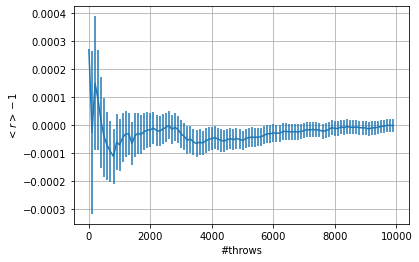

In [9]:
file=open('I_unif_samp.csv')
x,sum_prog, err=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

plt.errorbar(x,sum_prog-1,yerr=err)
plt.xlabel('#throws')
plt.ylabel(r'$<r>-1$')
plt.grid(True)
plt.show()

## Importance Sampling

Cambio distribuzione di probabilità $p(x)$ e calcolo la nuova funzione integrale campionata secondo $p(x)$
$$
I=\int_0^1 \frac{f(x)}{p(x)}p(x)dx
$$

La stima dell'integrale sarà $I=\frac{1}{N}\sum_i^N \bigl(\frac{f(x_i)}{p(x_i)}\bigr)$

Come nuova distribuzione di probabilità uso una retta (normalizzata)
$$
p(x)=2(1-x)
$$

Per campionare x uso il metodo della cumulata
$$
F(x)=\int_0^x 2(1-x)dx=y \longrightarrow x=F^{-1}(y)
$$
con y distribuito uniformemente in [0,1]



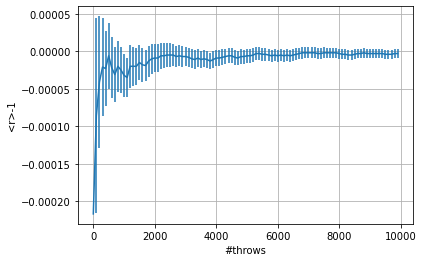

In [5]:
file=open('I_imp_samp.csv')
x2,sum_prog2, err2=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

plt.errorbar(x2,sum_prog2-1,yerr=err2)
plt.xlabel('#throws')
plt.ylabel('<r>-1')
plt.grid(True)
plt.show()

## Importance Sampling 2

La nuova distribuzione di probabilità p(x) è
$$
p(x)=\frac{3}{2}(1-x^2)
$$

Per campionare x uso il metodo accept reject.

Essendo più simile (in forma) alla funzione originale f(x) mi aspetto che sia quella con errore più basso

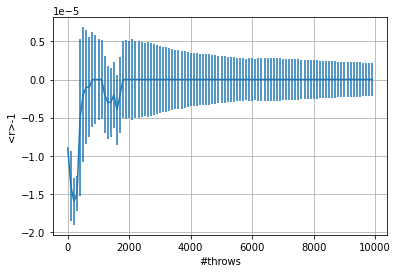

In [10]:
file=open('I_imp_samp2.csv')
x3,sum_prog3, err3=np.loadtxt(file, delimiter=",", usecols=[0,1,2], unpack=True)

plt.errorbar(x3,sum_prog3-1,yerr=err3)
plt.xlabel('#throws')
plt.ylabel('<r>-1')
plt.grid(True)
plt.show()

#### Grafici di confronto degli errori all'aumentare dell numero di blocchi

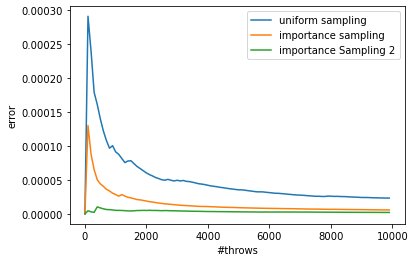

In [14]:
plt.plot(x,err, label="uniform sampling")
plt.plot(x2,err2, label="importance sampling")
plt.plot(x3,err3,label="importance Sampling 2")
plt.legend()
plt.xlabel('#throws')
plt.ylabel('error')
plt.show()